<a href="https://colab.research.google.com/github/markcastorm/Concrete-data-regression-Modeling/blob/main/Concrete_data_regression_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pyforest


  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=0c68c3c6f6bf3a38f5b81343dee55d5258dfd613133dde3b2d17b803c559324d
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
from pyforest import*
lazy_imports()

['import keras',
 'import awswrangler as wr',
 'import datetime as dt',
 'import sklearn',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.impute import SimpleImputer',
 'import cv2',
 'from fbprophet import Prophet',
 'import textblob',
 'import dash',
 'from sklearn.model_selection import train_test_split',
 'import pickle',
 'import numpy as np',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import LassoCV',
 'import skimage',
 'from sklearn.linear_model import Lasso',
 'import plotly as py',
 'from pathlib import Path',
 'from sklearn.model_selection import GridSearchCV',
 'import pydot',
 'from sklearn.linear_model import ElasticNet',
 'import gensim',
 'from sklearn.model_selection import cross_val_score',
 'import statistics',
 'import tensorflow as tf',
 'from sklearn.linear_model import RidgeCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import nltk',
 'from openpyxl import load_workbook',
 'import altair as alt',
 'from skle

In [ ]:
df = pd.read_excel('Concrete_Data.xls')

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.columns



Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
print(df.columns.tolist())

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [ ]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

In [ ]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

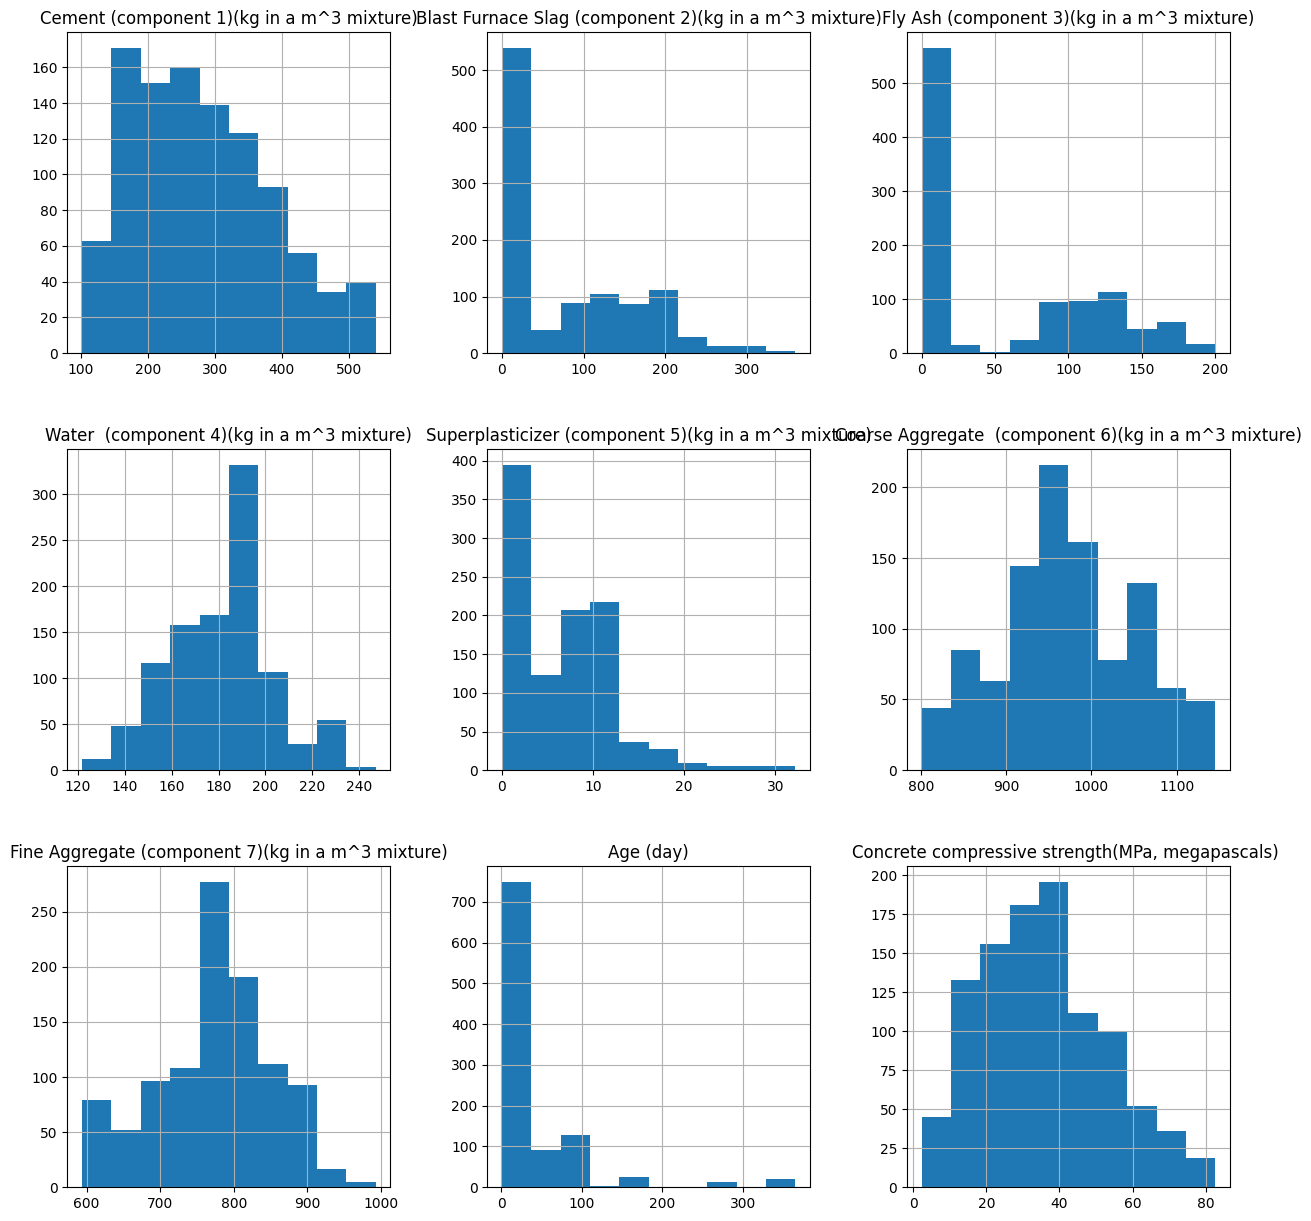

In [ ]:
df.hist(figsize=(15, 15))

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.16084578,  0.85739475,  0.9824742 , ..., -0.25745695,
        -0.64750466, -0.27567315],
       [ 1.30863359, -0.60248868,  1.23262536, ..., -1.92694714,
        -0.27313016, -0.27567315],
       [-0.07712211, -0.85558116,  1.06611849, ...,  1.01786573,
         0.06664868, -0.68931339],
       ...,
       [-0.86551317, -0.85558116,  1.12599843, ...,  1.3408288 ,
         0.3310584 ,  0.91561074],
       [ 1.78317559,  0.51111822, -0.83112174, ..., -1.54422319,
         0.11607106, -0.27567315],
       [ 0.28511162, -0.85558116,  0.93557085, ..., -0.61729375,
         0.13460445, -0.27567315]])

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
# Lasso Regression
lasso=Lasso().fit(X_train_scaled, y_train)
print("The accuracy if the training dataset is: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("The accuracy if the test dataset is: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("The number of features used: {:.2f}".format(np.sum(lasso.coef_ !=0)))

The accuracy if the training dataset is: 0.57
The accuracy if the test dataset is: 0.56


<IPython.core.display.Javascript object>

The number of features used: 6.00


In [ ]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train_scaled, y_train)
print("The accuracy if the training dataset is: {:.2f}".format(lasso001.score(X_train_scaled, y_train)))
print("The accuracy if the test dataset is: {:.2f}".format(lasso001.score(X_test_scaled, y_test)))
print("The number of features used: {:.2f}".format(np.sum(lasso001.coef_ !=0)))

The accuracy if the training dataset is: 0.61
The accuracy if the test dataset is: 0.63


<IPython.core.display.Javascript object>

The number of features used: 8.00


In [ ]:
lasso00001=Lasso(alpha=0.00001,max_iter=100000).fit(X_train_scaled, y_train)
print("The accuracy if the training dataset is: {:.2f}".format(lasso00001.score(X_train_scaled, y_train)))
print("The accuracy if the test dataset is: {:.2f}".format(lasso00001.score(X_test_scaled, y_test)))
print("The number of features used: {:.2f}".format(np.sum(lasso00001.coef_ !=0)))

The accuracy if the training dataset is: 0.61
The accuracy if the test dataset is: 0.63


<IPython.core.display.Javascript object>

The number of features used: 8.00


In [ ]:
lasso0083=Lasso(alpha=0.008371554902434368,max_iter=100000).fit(X_train_scaled, y_train)
print("The accuracy if the training dataset is: {:.2f}".format(lasso0083.score(X_train_scaled, y_train)))
print("The accuracy if the test dataset is: {:.2f}".format(lasso0083.score(X_test_scaled, y_test)))
print("The number of features used: {:.2f}".format(np.sum(lasso0083.coef_ !=0)))

The accuracy if the training dataset is: 0.61
The accuracy if the test dataset is: 0.63


<IPython.core.display.Javascript object>

The number of features used: 8.00


LassoCV class from scikit-learn is used, which performs Lasso regression with built-in cross-validation. The cv parameter is set to 5, indicating 5-fold cross-validation. The model is fitted to the training data using the fit() method, and the best alpha parameter is obtained using the alpha_ attribute.

In [ ]:
# Lasso Regression with cross-validation
lasso2 = LassoCV(cv=5)  # Set the number of cross-validation folds
lasso2.fit(X_train_scaled, y_train)

# Best alpha parameter
best_alpha = lasso2.alpha_

print("The accuracy of the training dataset is: {:.2f}".format(lasso2.score(X_train_scaled, y_train)))
print("The accuracy of the test dataset is: {:.2f}".format(lasso2.score(X_test_scaled, y_test)))
print("The number of features used: {:.0f}".format(np.sum(lasso2.coef_ != 0)))
print("Best alpha parameter: {:.2f}".format(best_alpha))


<IPython.core.display.Javascript object>

The accuracy of the training dataset is: 0.61
The accuracy of the test dataset is: 0.63


<IPython.core.display.Javascript object>

The number of features used: 8
Best alpha parameter: 0.01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

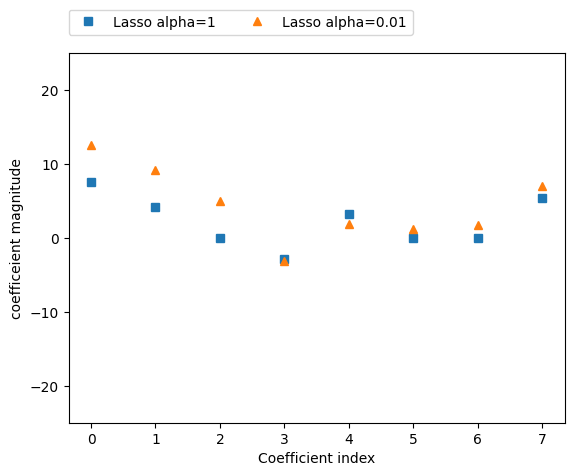

In [ ]:
plt.plot(lasso.coef_, 's',label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^',label="Lasso alpha=0.01")


plt.xlabel("Coefficient index")
plt.ylabel("coefficeient magnitude")

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))